In [14]:
using Convex
using ECOS
using PyPlot

In [15]:
data = readcsv("binary.csv");

In [16]:
admit=data[2:401,1];
gre=data[2:401,2];
gpa=data[2:401,3];
admit=float(admit);
gre=float(gre)/800;
gpa=float(gpa);
A=[gre gpa];

In [17]:
u=A;
y=admit;

In [18]:
function f(x,y,u)
    alpha=x[1:length(x)-1]
    beta=x[length(x)]
    zz=ones(size(y))
    -(u*alpha+beta)'*y+(log(1+exp(u*alpha+beta)))'*zz
    #xx=0
    #for i =1:length(y)
     #   xx=xx+y[i]*(alpha'*u[i,:]'+beta)-log(1+exp(alpha'*u[i,:]'+beta))
    #end
    #return -xx
end


f (generic function with 1 method)

In [19]:
function g(x,y,u) 
    alpha=x[1:length(x)-1]
    beta=x[length(x)]
    zz=ones(size(y))
    upp=u'*y-u'*(exp(u*alpha+beta)./(1+exp(u*alpha+beta)))
    lpp=zz'*y-zz'*(exp(u*alpha+beta)./(1+exp(u*alpha+beta)))
        #upp1=0
        #upp2=0
        #lpp=0
    #for i =1:length(y)
     #   upp1=upp1+y[i]*u[i,1]-exp(alpha[1]*u[i,1]+alpha[2]*u[i,2]+beta)/(1+exp(alpha[1]*u[i,1]+alpha[2]*u[i,2]+beta))*u[i,1]
     #   upp2=upp2+y[i]*u[i,2]-exp(alpha[1]*u[i,1]+alpha[2]*u[i,2]+beta)/(1+exp(alpha[1]*u[i,1]+alpha[2]*u[i,2]+beta))*u[i,2]
     #   lpp=lpp+y[i]-exp(alpha'*u[i,:]'+beta)/(1+exp(alpha'*u[i,:]'+beta))
    #end
    return [-upp; -lpp]
end

g (generic function with 1 method)

In [20]:
function firstord(y,u, maxIts, optTol)
    x=zeros(size(u,2)+1,1)
    its=0
    status = 0
    while status != 1
        alpha = 2
        sts = 0
        while sts !=1
            alpha=alpha/1.5
            xnew=x-alpha*g(x,y,u)
            ll=f(x,y,u)-f(xnew,y,u)+g(x,y,u)'*(xnew-x)+1/(2*alpha)*norm(xnew-x,2)^2
            if (ll[1]>=0)
                sts=1
            end
        end
        x=x-alpha*g(x,y,u)
        its=its+1
        if its>maxIts
            status =1
        end
        if norm(g(x,y,u))<optTol
            status =1
        end
    end
    return (x,its,norm(g(x,y,u)))
end

firstord (generic function with 1 method)

In [21]:
(x,its,nor)=firstord(y,u,10000, 1e-5);

In [22]:
alpha=x[1:2];
beta=x[3];

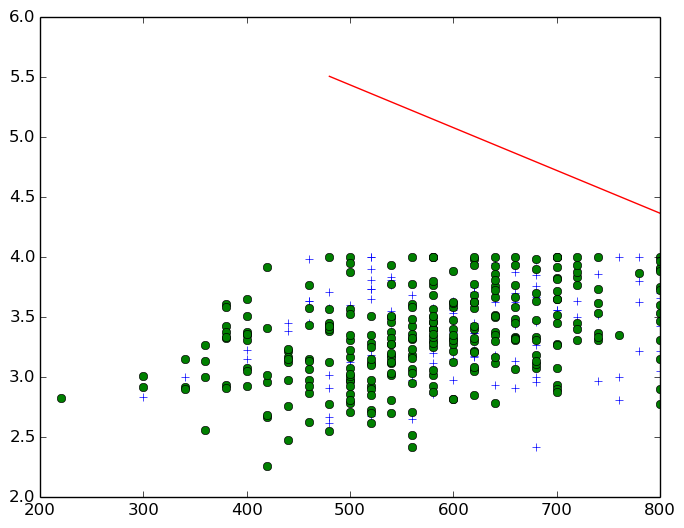

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f02519d1f50>

In [23]:
plot(gre[admit.==1]*800,gpa[admit.==1],"+")
plot(gre[admit.==0]*800,gpa[admit.==0],"o")
rrr=0.6*800:1/100:800
ry=-alpha[1]/alpha[2]*rrr/800+(1/2-beta)/alpha[2]
plot(rrr,ry)